In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
x=np.linspace(0,500,1000000)
noise=np.random.randn(len(x))

In [39]:
y_true=0.5*x+5+noise

In [40]:
x_df=pd.DataFrame(x,columns=['X'])
y_df=pd.DataFrame(y_true,columns=['Y'])

In [41]:
data=pd.concat([x_df,y_df],axis=1)
data.head()

,X,Y
0,0.0000,6.135134
1,0.0005,3.850727
2,0.0010,3.547919
3,0.0015,2.731275
4,0.0020,4.872031


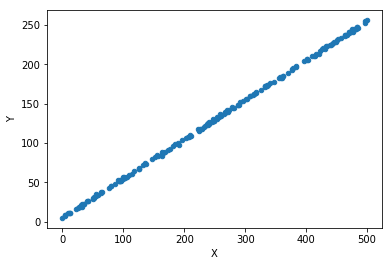

In [42]:
data.sample(n=200).plot(kind='scatter',x='X',y='Y')

In [43]:
np.random.randn(2)

array([-0.50729196, -0.53789123])

In [44]:
m=tf.Variable(1.94)
b=tf.Variable(1.54)

In [51]:
batch_size=10
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])
pred=m*xph+b
error=tf.reduce_sum(tf.square(pred-yph))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.000001)
train=optimizer.minimize(error)

In [52]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch=5000
    for i in range(batch):
        rand_ind=np.random.randint(len(x),size=batch_size)
        f={xph:x[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=f)
    m_model,b_model=sess.run([m,b])

In [53]:
print(m_model)
print(b_model)

0.5138338
1.6232456


In [54]:
y_hat=m_model*x+b_model

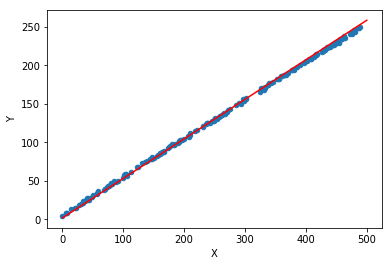

In [55]:
data.sample(200).plot(kind='scatter',x='X',y='Y')
plt.plot(x,y_hat,'r')

## TF Estimator 

In [56]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Q-Admin\\AppData\\Local\\Temp\\tmpu_25np6h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000F5715D82E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y_true,test_size=0.25)

In [59]:
print(x_train.shape)

(750000,)


In [60]:
input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,num_epochs=None,shuffle=True)

In [61]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,num_epochs=1000,shuffle=False)

In [62]:
test_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,num_epochs=1000,shuffle=False)

In [66]:
estimator.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmpu_25np6h\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2001 into C:\Users\Q-Admin\AppData\Local\Temp\tmpu_25np6h\model.ckpt.
INFO:tensorflow:loss = 342.08734, step = 2001
INFO:tensorflow:global_step/sec: 945.28
INFO:tensorflow:loss = 295.6059, step = 2101 (0.107 sec)
INFO:tensorflow:global_step/sec: 1347.93
INFO:tensorflow:loss = 270.22113, step = 2201 (0.074 sec)
INFO:tensorflow:global_step/sec: 1608.61
INFO:tensorflow:loss = 281.5863, step = 2301 (0.062 sec)
INFO:tensorflow:global_step/sec: 1466.68
INFO:tensorflow:loss = 294.4449, step = 2401 (0.068 sec)
INFO:tensorflow:global_step/sec: 1424.77
INFO:tensorflow:loss = 266.4563, step = 2501 (0.070 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 1583.09
INFO:tensorflow:loss = 116.37264, step = 9901 (0.063 sec)
INFO:tensorflow:global_step/sec: 1435.01
INFO:tensorflow:loss = 126.39943, step = 10001 (0.070 sec)
INFO:tensorflow:global_step/sec: 1546.26
INFO:tensorflow:loss = 140.24911, step = 10101 (0.064 sec)
INFO:tensorflow:global_step/sec: 1546.28
INFO:tensorflow:loss = 112.8607, step = 10201 (0.065 sec)
INFO:tensorflow:global_step/sec: 1608.61
INFO:tensorflow:loss = 109.48314, step = 10301 (0.062 sec)
INFO:tensorflow:global_step/sec: 1534.36
INFO:tensorflow:loss = 161.71906, step = 10401 (0.065 sec)
INFO:tensorflow:global_step/sec: 1511.12
INFO:tensorflow:loss = 121.707, step = 10501 (0.066 sec)
INFO:tensorflow:global_step/sec: 1583.08
INFO:tensorflow:loss = 110.49291, step = 10601 (0.064 sec)
INFO:tensorflow:global_step/sec: 1445.4
INFO:tensorflow:loss = 110.219315, step = 10701 (0.069 sec)
INFO:tensorflow:global_step/sec: 1394.9
INFO:tensorflow:loss = 144.40256, step = 10801 (0.072 sec)
INFO:

INFO:tensorflow:loss = 138.97914, step = 18101 (0.072 sec)
INFO:tensorflow:global_step/sec: 1704.84
INFO:tensorflow:loss = 122.242165, step = 18201 (0.058 sec)
INFO:tensorflow:global_step/sec: 1466.67
INFO:tensorflow:loss = 110.21301, step = 18301 (0.068 sec)
INFO:tensorflow:global_step/sec: 1445.42
INFO:tensorflow:loss = 92.76485, step = 18401 (0.070 sec)
INFO:tensorflow:global_step/sec: 1466.68
INFO:tensorflow:loss = 137.64128, step = 18501 (0.068 sec)
INFO:tensorflow:global_step/sec: 1356.93
INFO:tensorflow:loss = 134.66586, step = 18601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1404.71
INFO:tensorflow:loss = 140.28549, step = 18701 (0.071 sec)
INFO:tensorflow:global_step/sec: 1366.22
INFO:tensorflow:loss = 142.26088, step = 18801 (0.073 sec)
INFO:tensorflow:global_step/sec: 1511.12
INFO:tensorflow:loss = 107.79576, step = 18901 (0.066 sec)
INFO:tensorflow:global_step/sec: 1414.66
INFO:tensorflow:loss = 137.6185, step = 19001 (0.071 sec)
INFO:tensorflow:global_step/sec: 1424.77
I

In [75]:
train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-05-06:32:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmpu_25np6h\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-05-06:32:41
INFO:tensorflow:Saving dict for global step 22000: average_loss = 1.0019237, global_step = 22000, loss = 128.24623


In [74]:
test_metrics=estimator.evaluate(input_fn=test_input_func,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-05-06:32:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmpu_25np6h\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Finished evaluation at 2018-06-05-06:32:29
INFO:tensorflow:Saving dict for global step 22000: average_loss = 1.0004661, global_step = 22000, loss = 128.05966


In [77]:
print('Training data metrics: ',train_metrics)
print('Test data metrics: ',test_metrics)

Training data metrics:  {'average_loss': 1.0019237, 'loss': 128.24623, 'global_step': 22000}
Test data metrics:  {'average_loss': 1.0004661, 'loss': 128.05966, 'global_step': 22000}


In [82]:
brand_new_data=np.linspace(0,500,10)
brand_func=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [83]:
list(estimator.predict(input_fn=brand_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmpu_25np6h\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.987309], dtype=float32)},
 {'predictions': array([32.777004], dtype=float32)},
 {'predictions': array([60.5667], dtype=float32)},
 {'predictions': array([88.3564], dtype=float32)},
 {'predictions': array([116.146095], dtype=float32)},
 {'predictions': array([143.93578], dtype=float32)},
 {'predictions': array([171.72548], dtype=float32)},
 {'predictions': array([199.51517], dtype=float32)},
 {'predictions': array([227.30487], dtype=float32)},
 {'predictions': array([255.09456], dtype=float32)}]

In [84]:
predictions=[]
for pred in estimator.predict(input_fn=brand_func):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmpu_25np6h\model.ckpt-22000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


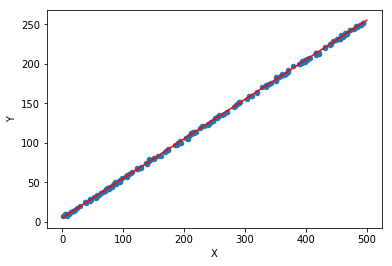

In [86]:
data.sample(200).plot(kind='scatter',x='X',y='Y')
plt.plot(brand_new_data,predictions,'r')